In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
directorys=['LTH_syn_plot']  # temp models
for directory in directorys:
    if not os.path.exists(directory):
        os.makedirs(directory)
result=np.load('result.npy')

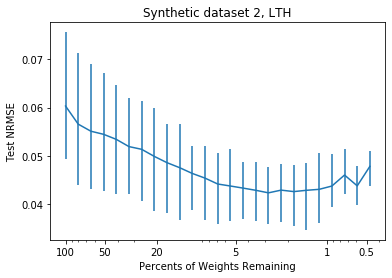

In [5]:
df=result.reshape(50,int(len(result)/50))
MaskLow,MaskUp,Maskmean,Ntr=[],[],[],[]
for j in range(25):
    i=1
    MaskLow.append(np.mean(df[i*5:i*5+5,j])-min(df[i*5:i*5+5,j]))
    MaskUp.append(max(df[i*5:i*5+5,j])-np.mean(df[i*5:i*5+5,j]))
    #FCLow.append(np.mean(df[i*5:i*5+5,2])-min(df[i*5:i*5+5,2]))
    #FCUp.append(max(df[i*5:i*5+5,2])-np.mean(df[i*5:i*5+5,2]))
    Maskmean.append(np.mean(df[i*5:i*5+5,j]))
    #FCmean.append(np.mean(df[i*5:i*5+5,2]))
    Ntr.append(0.8**j*100)
Maskerr= np.concatenate((np.array(MaskLow).reshape(1,len(MaskLow)),np.array(MaskUp).reshape(1,len(MaskUp))),axis=0)
    #FCerr=np.concatenate((np.array(FCLow).reshape(1,len(FCLow)),np.array(FCUp).reshape(1,len(FCUp))),axis=0)
fig, ax = plt.subplots()
#ax.errorbar(Ntr, FCmean, xerr=100, yerr=FCerr,capthick=4)
ax.errorbar(Ntr, Maskmean, xerr=0, yerr=Maskerr)
    #plt.legend(['OverparaFC','ParaACE'])
plt.xlabel('Percents of Weights Remaining')
plt.ylabel('Test NRMSE')   
plt.title('Synthetic dataset '+str(i+1)+', LTH') 
plt.xscale('log')
ax.invert_xaxis()
plt.xticks([0.5,1,5,20,50,100],[0.5,1,5,20,50,100])
plt.savefig('LTH_syn_plot/LTHsyn'+str(i+1)+'.pdf',bbox_inches='tight',dpi='figure',pad_inches=0.1)

plt.show()

In [3]:
for dataset in range(10):
    print(np.mean(df[dataset*5:dataset*5+5,13]))

0.026899707
0.043760933
0.032375075
0.032312255
0.038636867
0.033031326
0.01812317
0.021124717
0.029177096
0.024782972


In [4]:
np.mean(df[:,13])

0.03002241